# Project: 

A Comprehensive Analysis On Weather Conditions And  Solar Power Production

## Project Description:

Through this project, we will perform a comprehensive analysis on a weather-solar dataset to uncover the patterns and trends between weather conditions and solar power production to present valuable insights and recommendations help solar systems installation companies improve its processes.

## Importing Libraries And Data

In [1]:
# First, I'll load the necessary libraries and the data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/work/solar_weather.csv')

# Display the first few entries of the data for understanding.
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


- The loaded dataset includes several columns such as time, energy delta, GHI, temperature, pressure, humidity, wind speed, rain, snow, cloud coverage, the presence of the sun, sunlight duration, day length, ratio of sunlight time to day length, weather type, and the hour and month of data collection. 

Let's start the exploration by running some descriptive statistics and plotting histograms for the numerical columns to gain a better understanding of the distribution of our data.

In [2]:
# Run descriptive statistics on the numerical columns
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


- The descriptive statistics give an insight into the distribution of the data. For instance, the energy delta ranges from 0 to 5020 Wh with an average of around 573 Wh. Similarly, we can see that the GHI, which measures solar radiation, ranges from 0 to 229.2 units with an average of 32.6.

- The variables "temp", "pressure", and "humidity" give an idea of the weather conditions. We observe that temperature ranges from -16.6 to 35.8 degrees Celsius with an average temperature of about 9.79 degrees. The pressure, in units of hPa, averages at about 1015 hPa, and humidity averages at 79.8% with a minimum and maximum of 22% and 100% respectively.

- Moreover, the variable "clouds_all" suggests that the sky is covered by clouds about 66% of the time on average. Additionally, the "isSun" variable shows that the sun is present about 52% of the time on average.

- The "sunlightTime" variable ranges from 0 to 1020 minutes, with an average of 211.7 minutes per day. The average day length is about 748.6 minutes, demonstrating that the sun shines for approximately 28% of the day.

- Variables like "weather_type", "hour", and "month" are categorical in nature. Here, "hour" ranges from 0 to 23 representing the 24 hours of the day and "month" ranges from 1 to 12 indicating the 12 months of the year.

Let's continue our analysis by investigating correlations between the numerical variables, and then visualizing these correlations using a heatmap. This can help identify important relationships between different variables in the dataset.

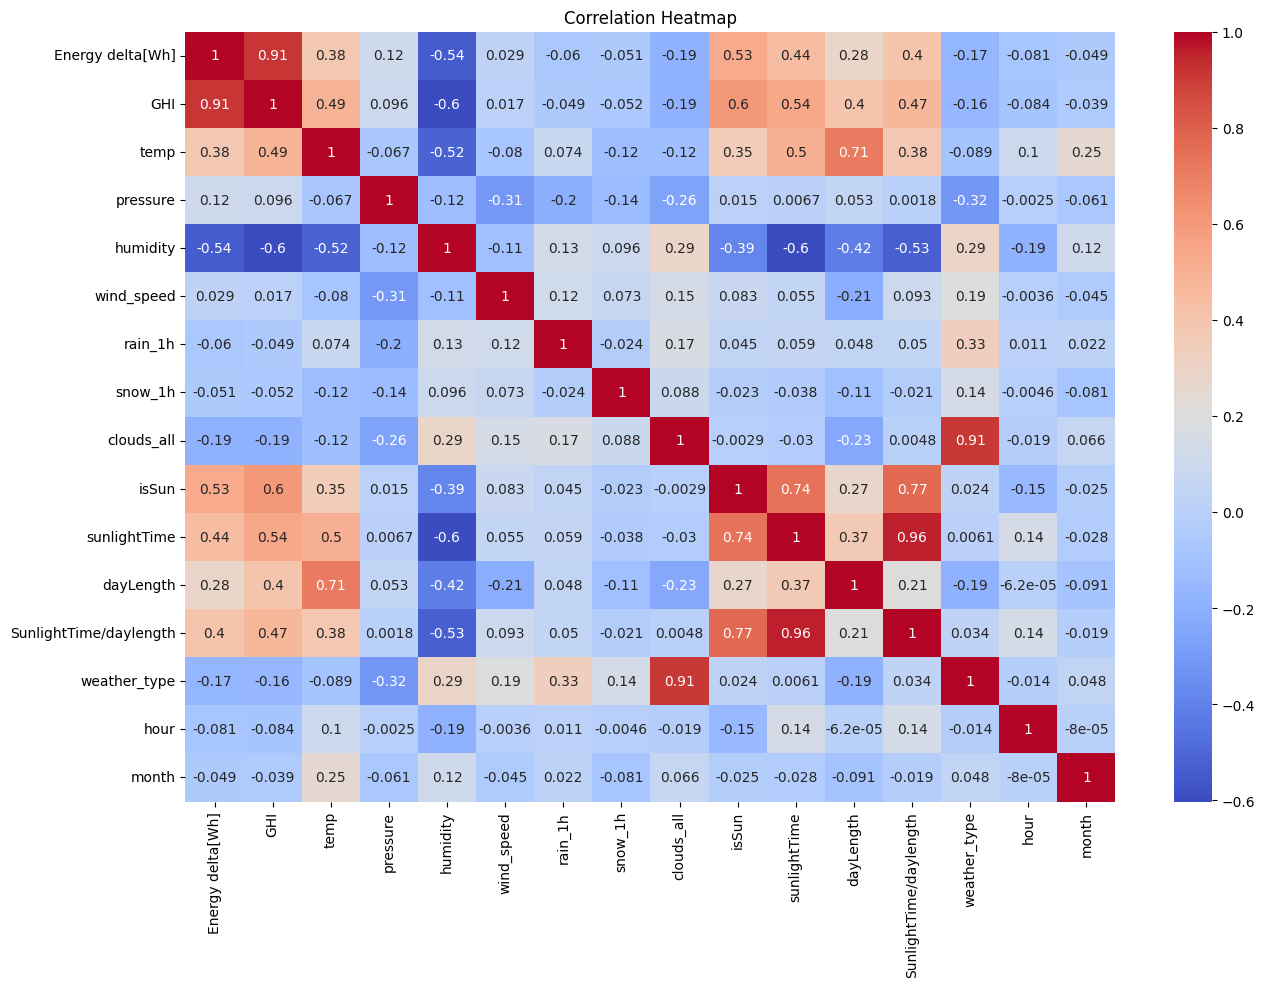

In [3]:
# Compute pairwise correlation of columns
correlations = df.corr()

# Construct a heatmap to visualize the correlations
plt.figure(figsize=(15,10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap of the correlations presents some interesting insights:

- 1. As expected, there is a strong positive correlation between "GHI" (Global Horizontal Irradiance - a measure of solar power) and the "Energy delta[Wh]" (change in energy consumption). This suggests that when there is more solar irradiance, more energy is produced.

- 2. There is also a strong positive correlation between "sunlightTime" (the time during the day when there is sunlight) and "Energy delta[Wh]". This makes sense, as one would expect more energy to be generated when there is more sunlight.

- 3. The "isSun" variable is strongly positively correlated with the "GHI", indicating that the presence of sun significantly impacts solar irradiance, perhaps reflecting the time of day (sunrise, midday, sunset).

- 4. "SunlightTime/dayLength" also presents significant positive correlations with "GHI", "Energy delta[Wh]", "sunlightTime" and "isSun" indicating that renewables energy generation is highly dependent on the portion of the day during which there is sunlight.

- 5. Temperature ("temp") has a moderate positive correlation with "GHI" and "Energy delta[Wh]". This might be due to the fact that solar panels can be more efficient at a certain temperature.

- 6. There is a negative correlation between “clouds_all” and "GHI", which implies that the more cloudy it is, the less solar radiation is received.

- 7. The hour of the day also shows moderate positive correlation with "SunlightTime/daylength", "sunlightTime", "isSun", "GHI" and "Energy delta[Wh]". This observation could be attributed to the fact that as the day progresses, so does the availability of sunlight thereby increasing the potential of power generation. 

Next, let's examine how energy generation distributes across different hours and the impact of weather types.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


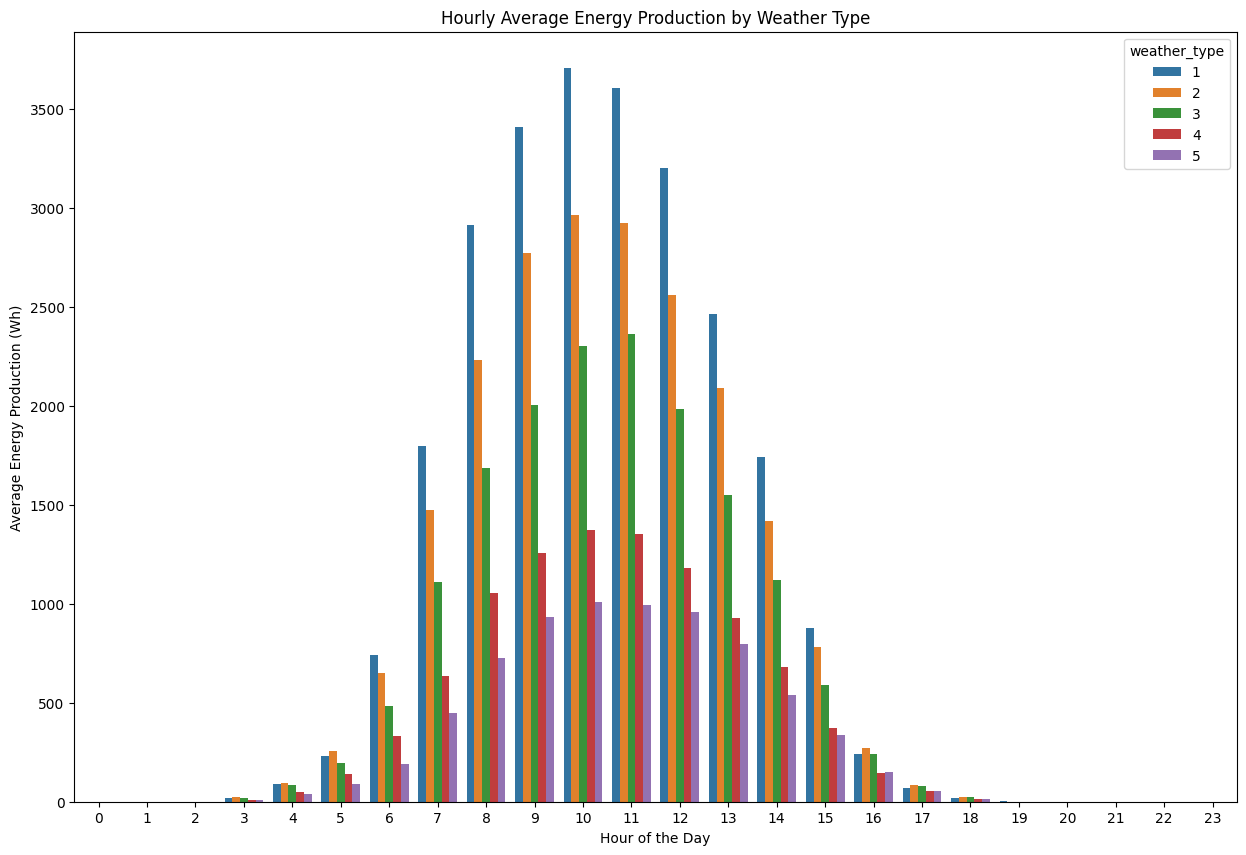

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


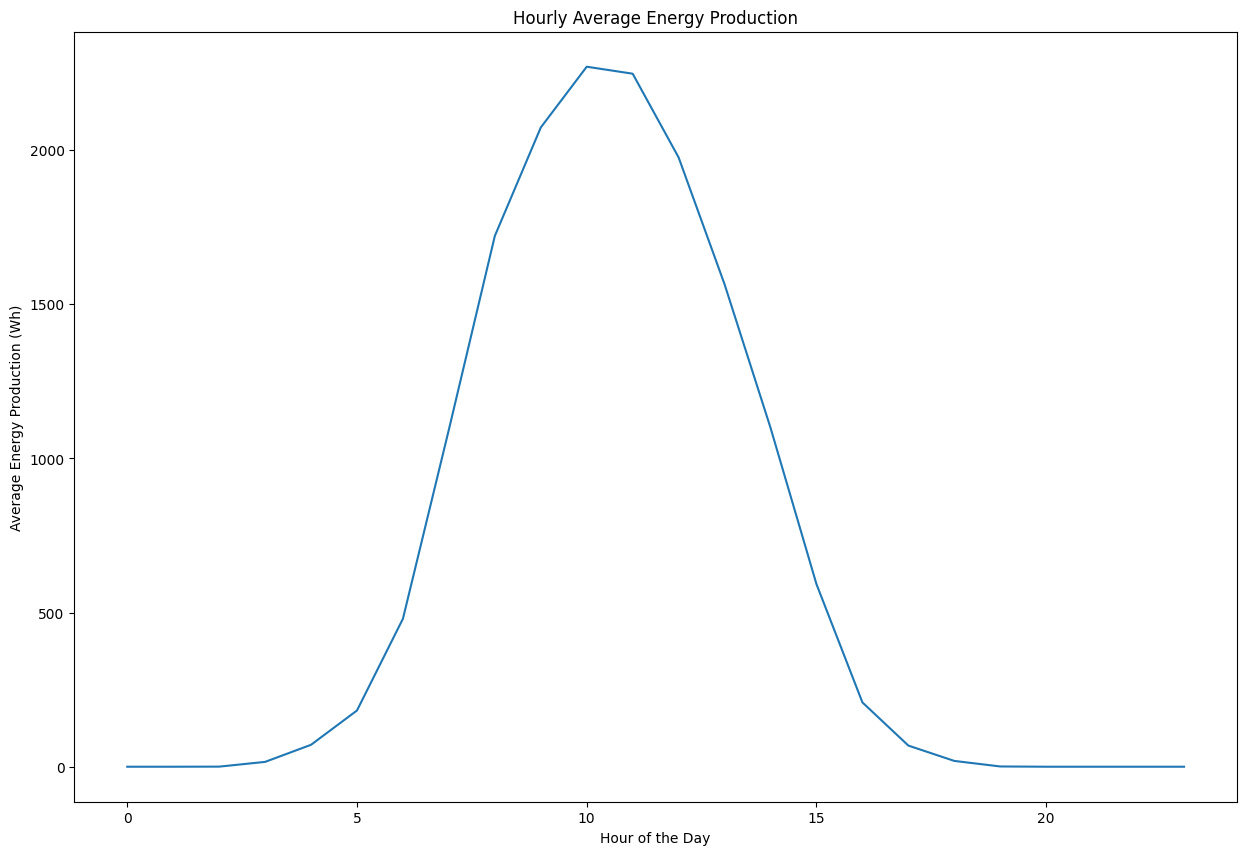

In [4]:
# Group by hour and weather type, then calculate the average energy production
grouped_df = df.groupby(['hour', 'weather_type']).mean().reset_index()

# Create a barplot to show the average energy production during each hour and weather type
plt.figure(figsize=(15,10))
sns.barplot(x='hour', y='Energy delta[Wh]', hue='weather_type', data=grouped_df, ci=None)
plt.title('Hourly Average Energy Production by Weather Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Production (Wh)')
plt.show()

# Create a line plot to show the average energy production during each hour
plt.figure(figsize=(15,10))
sns.lineplot(x='hour', y='Energy delta[Wh]', data=grouped_df, ci=None)
plt.title('Hourly Average Energy Production')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Production (Wh)')
plt.show()

- The bar plot and line plot display the average energy production for each hour of the day.

- From the bar plot, we can see how weather affects energy production. On average, clear weather (weather_type = 1) contributes to higher energy generation, followed by partially cloudy (weather_type = 2) and cloudy weather (weather_type = 4). Rainy and snowy weather (weather_type = 3 and 5) show the least energy production, as expected.

- From the line plot, we can see that energy production peaks at around midday and is the lowest during early morning and late evening. This trend makes sense, as solar power is highly dependent on sunlight, which is highest during midday.

## Bi-Variate Analysis

Let's perform further Bi-Variate analysis to find relationships between renewable energy generation and other variables. Some possible analysis could be:

- 1. Month-wise Analysis: Understand how the average energy generation varies across different months. This would allow us to comprehend how seasons affect energy generation.

- 2. Weather Type Analysis: Investigate the distribution of energy generation across different weather types. With this, we can understand how different weather conditions impact energy generation.

- 3. Correlation Analysis: Further explore the correlations between variables like temperature, pressure, humidity, and wind speed with energy generation. The insights from this correlation analysis could allow us to identify other weather parameters that have significant effects on energy generation.

Let's start the further analysis with a month-wise analysis of energy generation.

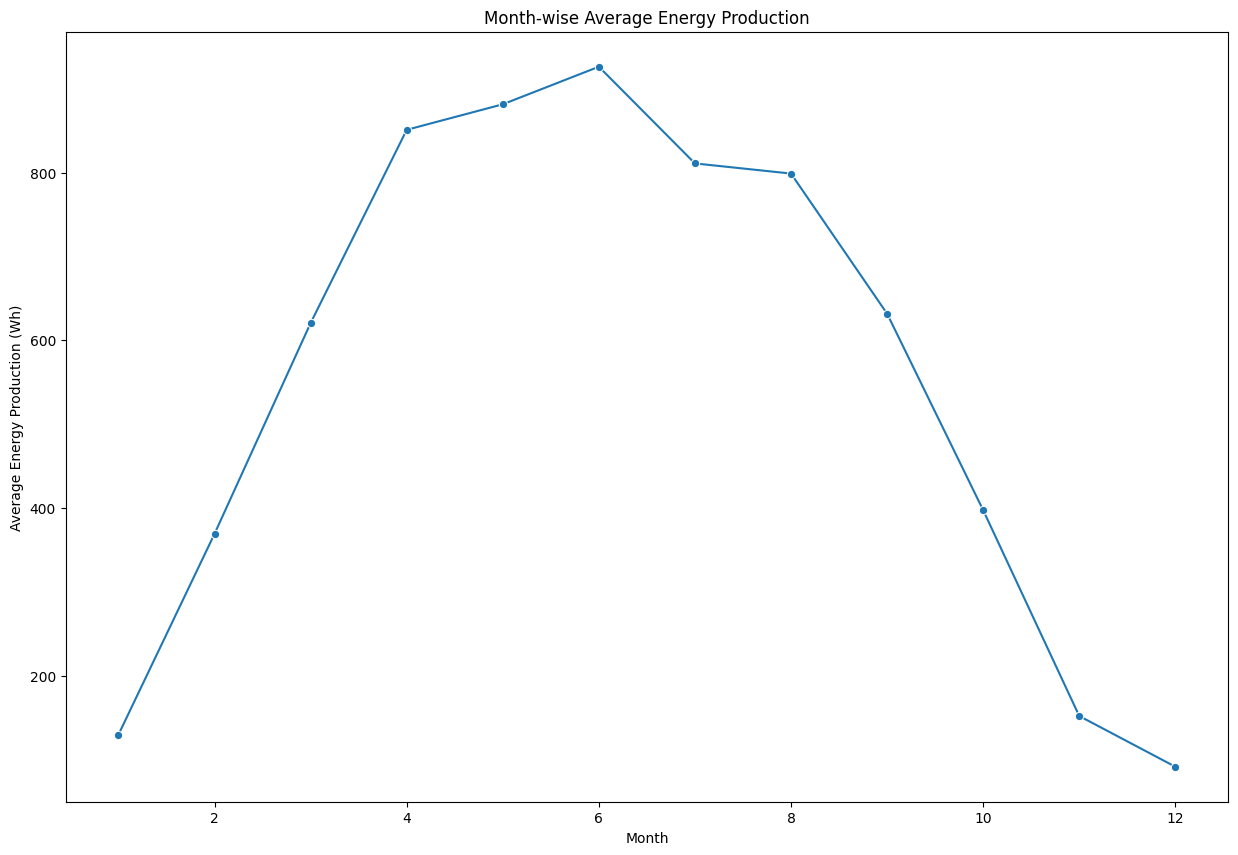

In [5]:
# Group by month, then calculate the average energy production
grouped_month_df = df.groupby(['month']).mean().reset_index()

# Create a line plot to show the average energy production during each month
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='Energy delta[Wh]', data=grouped_month_df, marker='o')
plt.title('Month-wise Average Energy Production')
plt.xlabel('Month')
plt.ylabel('Average Energy Production (Wh)')
plt.show()

- The line plot shows the average energy production for each month across several years. Here, we can observe that energy production is at its peak during the middle of the year, specifically between the months of May and August. This is likely due to more sunny days and longer daylight hours during these summer months. Similarly, energy production is at its lowest during winter months, probably due to shorter daylight hours and less intense sun.

- This analysis suggests that the renewable energy generation is significantly affected by the time of the year, possibly due to factors like the variation in daylight hours and seasonal weather changes.

Next, let's examine the distribution of energy generation across different weather types.

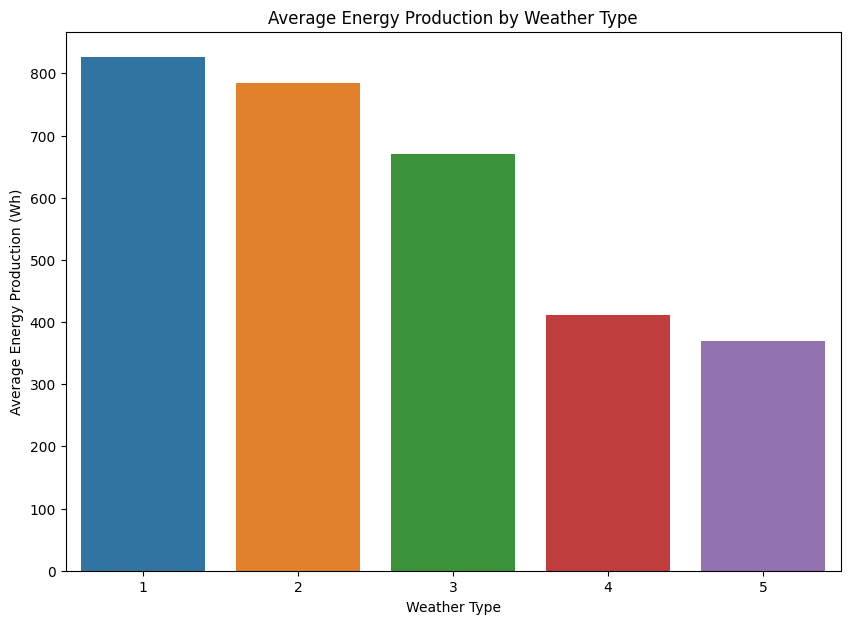

In [6]:
# Group by weather_type, then calculate the average energy production
grouped_weather_df = df.groupby(['weather_type']).mean().reset_index()

# Create a bar plot to show the average energy production during each weather type
plt.figure(figsize=(10,7))
sns.barplot(x='weather_type', y='Energy delta[Wh]', data=grouped_weather_df)
plt.title('Average Energy Production by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Energy Production (Wh)')
plt.show()

- The bar plot shows the average energy production by weather type. The weather types are encoded as numerical values. This plot suggests that the weather type significantly impacts renewable energy generation. Assuming the weather types are encoded such that higher numbers reflect worse weather conditions (e.g., 1 for clear skies and 5 for heavy rain or snow), we can observe that clear weather leads to higher energy production, while harsh weather conditions are associated with lower energy production.

- While these are broad categories and the exact encoding of weather types is not provided, the general trend emphasizes the dependence of renewable energy systems, especially solar power, on weather conditions. This highlights the importance of geographical and climatic considerations when planning renewable energy systems.

Finally, let's analyze the impact of other weather parameters like temperature, pressure, humidity, and wind speed on energy generation by constructing multiple regression models.

In [7]:
# Import numpy
import numpy as np

# Let's construct a regression model to predict energy generation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the feature set and target variable
X = df[['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'dayLength', 'hour']]
y = df['Energy delta[Wh]']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict energy generation on the testing set
y_pred = model.predict(X_test)

# Compute the root mean square error of our predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Let's look at the coefficients for our model to understand the relationship between variables and energy generation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

rmse, coefficients

(405.0608551432382,
             Coefficient
 GHI           19.048989
 temp          -5.107165
 pressure       1.651869
 humidity      -1.319718
 wind_speed    -1.327283
 clouds_all    -0.760407
 dayLength     -0.478450
 hour          -0.210992)

- The multiple regression model indicates the influence of the different weather parameters, time of day, and the length of the day on the renewable energy generation. The root mean squared error (RMSE) of our predictions is approximately 405.061, meaning our model's predictions are typically off by about 405.061Wh.

- Looking at the model's coefficients, we can see that solar irradiance (GHI) has the strongest positive effect on energy generation, with each additional unit of GHI leading to an increase of approximately 19.05 Wh in energy. This signifies the direct dependence of renewable energy, especially solar, on the availability of sunlight.

- Temperature seems to have a moderate negative impact on energy generation. This is likely due to the fact that higher temperatures can actually decrease the efficiency of solar panels.

- The pressure has a small positive effect on energy production. A higher atmospheric pressure might lead to clearer skies, hence slightly increasing the energy production.

- Humidity and wind speed also negatively affect the energy generation, resulting in a decrease when these parameters increase. This can potentially be explained by the correlation between these variables and the transient weather conditions. High humidity and wind speed might be associated with unfavorable weather conditions like rain, snow, or more cloud cover.

- Clouds_all, showing the percentage of cloud cover, and dayLength are negatively correlated with energy consumption. More cloud cover and longer day lengths contribute a decrease in energy production. This seems counter-intuitive for dayLength but might be related to the fact that parts of the day with sunlight are more crucial to energy production than the total length of the day.

- The hour of the day also shows a small negative correlation with energy generation; this could be nuanced due to various factors like changing temperature and weather conditions throughout the day.

These observations together suggest the complex interplay of various environmental factors and time variables in determining renewable energy generation.


In conclusion, the analysis reveals a clear relationship between weather conditions, time of day, and renewable energy generation. Clear weather and more sunlight hours promote higher energy production, pointing to the significance of these factors in maximizing the efficiency and output of renewable energy sources, particularly solar power.

# Analysis Done!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de74ada6-6892-4c01-99ac-0f5c069852c8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>